In [170]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 
from chocolates import chocolate_masking_weighted

def segmentation(img):
    # --- 1. Load and Resize Image ---
    img = cv2.resize(img, (1600,1067))

    masked = chocolate_masking_weighted(img, 5, (1, 1, 0))

    # --- 2. Convert to HSV ---
    hsv = cv2.cvtColor(masked, cv2.COLOR_RGB2HSV_FULL)
    value = hsv[:, :, 1]
    #plt.imshow(value, cmap='gray')


    # --- 3. Thresholding ---
    thresh = 75
    value_thresh = np.zeros_like(value)
    value_thresh[value > thresh] = value[value > thresh]
    #plt.imshow(value_thresh, cmap='gray')

    # --- 4. Canny Edge Detection --
    edges = cv2.Canny(value_thresh, 200, 250)
    #plt.imshow(edges, cmap='gray')

    # --- 5. Dilate to Connect Broken Edges ---
    radius = 5
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*radius+1, 2*radius+1))
    dilated = cv2.dilate(edges, kernel, iterations=1)
    #plt.imshow(dilated, cmap='gray')

    # --- 7. Remove Small Objects by Area Filtering ---
    # Find all contours
    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # --- 7. Replace small contour filtering with ellipse fitting ---
    mask = np.zeros_like(dilated)

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < 200000:
            cv2.drawContours(mask, [cnt], -1, 255, thickness=cv2.FILLED)

    #plt.imshow(mask, cmap='gray')
    
    # Separate objects
    radius = 50
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*radius+1, 2*radius+1))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

    #plt.imshow(mask, cmap='gray')

    # --- 8. Apply Mask to Original Image ---
    segmented_objects = cv2.bitwise_and(img, img, mask=mask)

    return segmented_objects

def plot_choc(img):
    plt.figure()
    plt.imshow(img)
    plt.title("Chocolate")
    plt.axis('off')
    plt.show()

def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    plt.show()

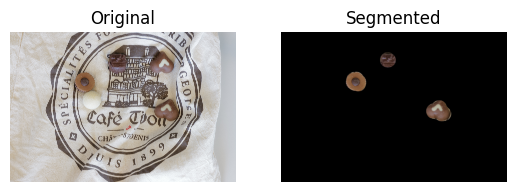

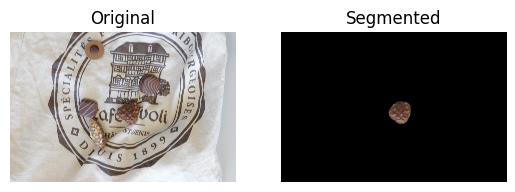

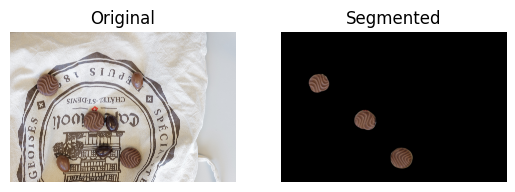

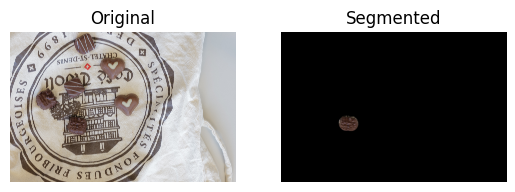

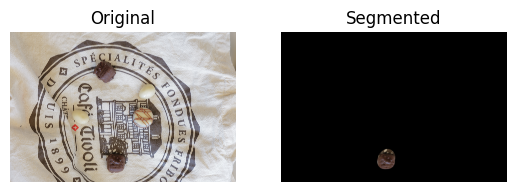

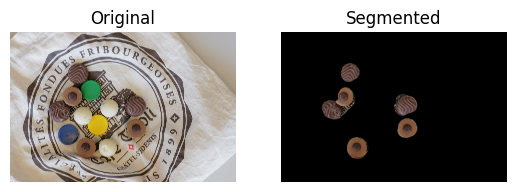

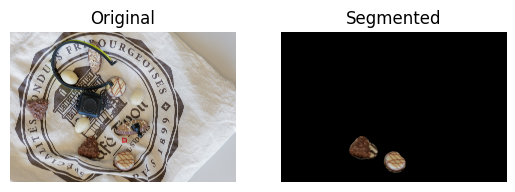

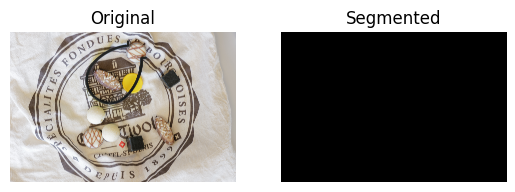

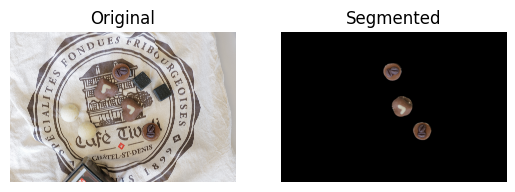

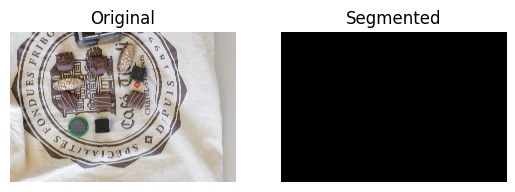

In [171]:
path_ref = 'dataset_project_iapr2025/background_sac/'
jpg_files = [f for f in os.listdir(path_ref)]
# im_org = os.path.join(path_ref, jpg_files[2])
# img = mpimg.imread(im_org)
# res = segmentation(img)
# show_comparison(img, res, "Segmented")
for i in range(len(jpg_files)):
    im_org = os.path.join(path_ref, jpg_files[i])
    img = mpimg.imread(im_org)
    res = segmentation(img)
    show_comparison(img, res, "Segmented")